---
# bg sub

In [139]:
# mask_hand.shape
# a= np.array([1,2,3,4])
# b= np.array([1,2,3,4])

# a*b
# img = cv2.imread('img/bottle_50.jpg')
cv2.imshow('QQQ', frame[:,:,0]*np.abs(handmask-255))
k = cv2.waitKey(0)
if k == 27: # esc
    cap.release()
    cv2.destroyAllWindows()

In [210]:
handmask.shape
np.dstack([handmask]*3).shape

(480, 852, 3)

In [10]:
import cv2
import numpy as np
import math

# cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture('0501-3.mp4')

# 옵션 설명 http://layer0.authentise.com/segment-background-using-computer-vision.html
fgbg = cv2.createBackgroundSubtractorMOG2(varThreshold=100, detectShadows=False)
# fgbg = cv2.bgsegm.createBackgroundSubtractorMOG()
# fgbg = cv2.bgsegm.createBackgroundSubtractorGMG()

margin = 1.0
idx=0
mergedAreas = []
preRect = []
while(1):
    idx+=1
    ret, frame = cap.read()
    if(ret):
        
        fgmask = fgbg.apply(frame)
#         ret, fgmask = cv2.threshold(fgmask, 240, 255, cv2.THRESH_BINARY)
#         fgmask = cv2.dilate(fgmask, np.ones((20,20)), iterations=1)
#         fgmask = cv2.erode(fgmask, np.ones((20,20)), iterations=1)

#         for i in range(10, 31,10):
#             fgmask = cv2.dilate(fgmask, np.ones((i,i)), iterations=1)
#             fgmask = cv2.erode(fgmask, np.ones((i+2,i+2)), iterations=1)
#         fgmask = cv2.dilate(fgmask, np.ones((30,30)), iterations=1)
        
        cv2.imshow('bgsub', fgmask)
        
        '''스킨제거'''
        #YCrCb 변환
        ycrcb = cv2.cvtColor(frame,cv2.COLOR_BGR2YCrCb)
        #Cr:133~173, Cb:77~127
#         handmask = cv2.inRange(ycrcb,np.array([0,128,73]),np.array([255,170,158]))
#         handmask = cv2.dilate(handmask, np.ones((40,40)), iterations=1)
#         fgmask = fgmask*np.abs(handmask-255)
        
#         bordermask = cv2.inRange(frame,np.array([0,0,0]),np.array([5,5,5]))
# #         fgmask = fgmask*np.abs(bordermask-255)
#         bordermask = cv2.dilate(bordermask, np.ones((8,8)), iterations=1)
# #         fgmask = cv2.bitwise_and(fgmask, fgmask, mask=(bordermask-255))
        
#         edge = fgmask
        edge = cv2.Canny(fgmask, 0,200) # bgmask에 canny edge detection 적용
        
        # contour
#         img_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#         _ret, img_binary = cv2.threshold(img_gray, 127, 255, 0)
        # bg sub 적용된 값 사용
#         contours, hierarchy = cv2.findContours(edge, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#         for cnt in contours:
#             cv2.drawContours(frame, [cnt], 0, (255, 0, 0), 2)  # blue

#         cv2.putText(frame, str(len(contours)), (40,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,225), 3)
        
    
        nlabels, _labels, stats, centroids = cv2.connectedComponentsWithStats(edge)
#                 nlabels, _labels, stats, centroids = cv2.connectedComponentsWithStats(fgmask)

        data = []
        centers = []
        for index, centroid in enumerate(centroids):
            if stats[index][0] == 0 and stats[index][1] == 0:  #x,y
                continue
            if np.any(np.isnan(centroid)):
                continue

            x, y, width, height, area = stats[index]
            centerX, centerY = int(centroid[0]), int(centroid[1])


            
            if area > 20: #  컨벡스헐 크기
                # 유효한 값만 저장
                data.append(stats[index])
                centers.append([centerX, centerY])
            
                cv2.circle(frame, (centerX, centerY), 1, (0, 255, 0), 2)
                cv2.rectangle(frame, (x, y), (x + width, y + height), (0, 255, 0))
        
        cv2.putText(frame, str(len(data)), (40,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,225), 3)

                
        data = np.array(data)
        centers = np.array(centers)
        
        # 머지된 사각형 그리기
        mergedRect = mergeByDist(data, ratio=.7)
        cv2.rectangle(frame, (mergedRect[0], mergedRect[1]), (mergedRect[2], mergedRect[3]), (0, 0, 255), 2)
#         mergedRect2 = mergeByDist(data, ratio=.9)
#         cv2.rectangle(frame, (mergedRect2[0], mergedRect2[1]), (mergedRect2[2], mergedRect2[3]), (0, 255, 255), 2)
        area = (mergedRect[2] - mergedRect[0])*(mergedRect[3] - mergedRect[1])
        mergedAreas.append(area)
        
#         if(centers.shape[0]>0 and idx%5==0):
#             x1, y1, x2, y2, cluster_centers = mergeData(data, centers)
#             width = x2-x1
#             height = y2-y1
#             x1 = max(int(x1 - width*margin/2), 0)
#             x2 = min(int(x2 + width*margin/2), 640)
#             y1 = max(int(y1 - height*margin/2), 0)
#             y2 = min(int(y2 + height*margin/2), 480)
            
#             ''' 클러스터 정보 표시'''
#             for c in cluster_centers:
#                 cv2.circle(frame, (int(c[0]), int(c[1])), 8, (0, 0, 255), 5)
                
#             cv2.rectangle(frame, (x1,y1), (x2,y2), (0, 0, 255), 3)   
#             cv2.imwrite('./img/bottle_'+str(idx)+'.jpg', frame)
#             CreateMarkbyminmax('bottle_'+str(idx)+'.jpg', labels, 640, 480, x1, y1, x2, y2)
        
        
            # 종합 영역 그리기
            # min X , max Y 필요
#             minX = data[0].min()
#             maxY = (data[1] + data[3]).max()
#             cv2.rectangle(frame, (minX, maxY), (x + width, maxY), (0, 0, 255))
#             cv2.circle(frame, (int(centers[:,0].mean()), int(centers[:,1].mean())), 1, (0, 0, 255), 2)
        
        # 영역 각각 그리기
        cv2.imshow('edge', edge)
#         cv2.imshow('hadmask', handmask)
        cv2.imshow('frame',frame)
        

        k = cv2.waitKey(30) & 0xff 
        if k == 27: # esc
            break
    else: break
cap.release()
cv2.destroyAllWindows()        

In [ ]:
import cv2
import numpy as np

# cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture('0501-3.mp4')

# 옵션 설명 http://layer0.authentise.com/segment-background-using-computer-vision.html
fgbg = cv2.createBackgroundSubtractorMOG2(varThreshold=100, detectShadows=False)
# fgbg = cv2.bgsegm.createBackgroundSubtractorMOG()
# fgbg = cv2.bgsegm.createBackgroundSubtractorGMG()

margin = 1.0
idx=0
mergedAreas = []
preRect = []
while(1):
    idx+=1
    ret, frame = cap.read()
    if(ret):
        
        fgmask = fgbg.apply(frame)
#         ret, fgmask = cv2.threshold(fgmask, 240, 255, cv2.THRESH_BINARY)
#         fgmask = cv2.dilate(fgmask, np.ones((20,20)), iterations=1)
#         fgmask = cv2.erode(fgmask, np.ones((20,20)), iterations=1)

#         for i in range(10, 31,10):
#             fgmask = cv2.dilate(fgmask, np.ones((i,i)), iterations=1)
#             fgmask = cv2.erode(fgmask, np.ones((i+2,i+2)), iterations=1)
#         fgmask = cv2.dilate(fgmask, np.ones((30,30)), iterations=1)
        
        cv2.imshow('bgsub', fgmask)
        
        '''스킨제거'''
        #YCrCb 변환
        ycrcb = cv2.cvtColor(frame,cv2.COLOR_BGR2YCrCb)
        #Cr:133~173, Cb:77~127
#         handmask = cv2.inRange(ycrcb,np.array([0,128,73]),np.array([255,170,158]))
#         handmask = cv2.dilate(handmask, np.ones((40,40)), iterations=1)
#         fgmask = fgmask*np.abs(handmask-255)
        
#         bordermask = cv2.inRange(frame,np.array([0,0,0]),np.array([5,5,5]))
# #         fgmask = fgmask*np.abs(bordermask-255)
#         bordermask = cv2.dilate(bordermask, np.ones((8,8)), iterations=1)
# #         fgmask = cv2.bitwise_and(fgmask, fgmask, mask=(bordermask-255))
        
#         edge = fgmask
        edge = cv2.Canny(fgmask, 0,200) # bgmask에 canny edge detection 적용
        
        # contour
#         img_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#         _ret, img_binary = cv2.threshold(img_gray, 127, 255, 0)
        # bg sub 적용된 값 사용
#         contours, hierarchy = cv2.findContours(edge, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#         for cnt in contours:
#             cv2.drawContours(frame, [cnt], 0, (255, 0, 0), 2)  # blue

#         cv2.putText(frame, str(len(contours)), (40,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,225), 3)
        
    
        nlabels, _labels, stats, centroids = cv2.connectedComponentsWithStats(edge)
#                 nlabels, _labels, stats, centroids = cv2.connectedComponentsWithStats(fgmask)

        data = []
        centers = []
        for index, centroid in enumerate(centroids):
            if stats[index][0] == 0 and stats[index][1] == 0:  #x,y
                continue
            if np.any(np.isnan(centroid)):
                continue

            x, y, width, height, area = stats[index]
            centerX, centerY = int(centroid[0]), int(centroid[1])


            
            if area > 20: #  컨벡스헐 크기
                # 유효한 값만 저장
                data.append(stats[index])
                centers.append([centerX, centerY])
            
                cv2.circle(frame, (centerX, centerY), 1, (0, 255, 0), 2)
                cv2.rectangle(frame, (x, y), (x + width, y + height), (0, 255, 0))
        
        cv2.putText(frame, str(len(data)), (40,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,225), 3)

                
        data = np.array(data)
        centers = np.array(centers)
        
        # 머지된 사각형 그리기
        mergedRect = mergeByDist(data, ratio=.7)
        if bool(preRect):
            if diff_median*7 < abs(calcArea(mergedRect)-calcArea(preRect)):
                mergedRect = preRect
        cv2.rectangle(frame, (mergedRect[0], mergedRect[1]), (mergedRect[2], mergedRect[3]), (0, 0, 255), 2)
#         mergedRect2 = mergeByDist(data, ratio=.9)
#         cv2.rectangle(frame, (mergedRect2[0], mergedRect2[1]), (mergedRect2[2], mergedRect2[3]), (0, 255, 255), 2)
        area = (mergedRect[2] - mergedRect[0])*(mergedRect[3] - mergedRect[1])
        mergedAreas.append(area)
        
        preRect = mergedRect
        
#         if(centers.shape[0]>0 and idx%5==0):
#             x1, y1, x2, y2, cluster_centers = mergeData(data, centers)
#             width = x2-x1
#             height = y2-y1
#             x1 = max(int(x1 - width*margin/2), 0)
#             x2 = min(int(x2 + width*margin/2), 640)
#             y1 = max(int(y1 - height*margin/2), 0)
#             y2 = min(int(y2 + height*margin/2), 480)
            
#             ''' 클러스터 정보 표시'''
#             for c in cluster_centers:
#                 cv2.circle(frame, (int(c[0]), int(c[1])), 8, (0, 0, 255), 5)
                
#             cv2.rectangle(frame, (x1,y1), (x2,y2), (0, 0, 255), 3)   
#             cv2.imwrite('./img/bottle_'+str(idx)+'.jpg', frame)
#             CreateMarkbyminmax('bottle_'+str(idx)+'.jpg', labels, 640, 480, x1, y1, x2, y2)
        
        
            # 종합 영역 그리기
            # min X , max Y 필요
#             minX = data[0].min()
#             maxY = (data[1] + data[3]).max()
#             cv2.rectangle(frame, (minX, maxY), (x + width, maxY), (0, 0, 255))
#             cv2.circle(frame, (int(centers[:,0].mean()), int(centers[:,1].mean())), 1, (0, 0, 255), 2)
        
        # 영역 각각 그리기
        cv2.imshow('edge', edge)
        cv2.imshow('hadmask', handmask)
        cv2.imshow('frame',frame)
        

        k = cv2.waitKey(30) & 0xff 
        if k == 27: # esc
            break
    else: break
cap.release()
cv2.destroyAllWindows()        

In [597]:
cap.release()
cv2.destroyAllWindows()      

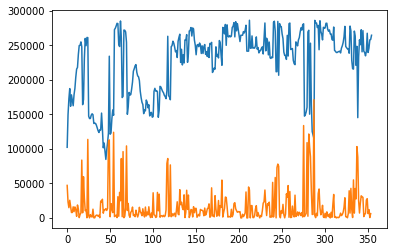

In [7]:
from matplotlib import pyplot as plt
mergedAreas = np.array(mergedAreas)
plt.plot(mergedAreas)
plt.plot(abs(mergedAreas[1:] - mergedAreas[:-1]))
plt.show()

In [8]:
import statistics
diff = abs(mergedAreas[1:] - mergedAreas[:-1])
diff_median = statistics.median(diff)

def calcArea(rect):
    return (rect[2]-rect[0])*(rect[3]-rect[1])

In [9]:
def calcDist(d, cx=426, cy=240):
    x=d[0]; y=d[1]; width=d[2]; height=d[3]
    x_c = (x+width)/2
    y_c = (y+height)/2
    dist = math.sqrt((cx-x_c)**2 + (cy-y_c)**2)
    return (d, dist)

def mergeRect2(rectArr, ratio=.8):
    finIdx = int(len(rectArr)*ratio)
    finRec = (426, 240 ,0,0)
    netArea = 480*852
    preArea = math.inf
    for rect in rectArr:
#     for rect in rectArr[:finIdx]:
        x = min(finRec[0], rect[0][0])
        y = min(finRec[1], rect[0][1])
        x2= max(finRec[2], rect[0][0]+rect[0][2])
        y2= max(finRec[3], rect[0][1]+rect[0][3]) 
        if (x2-x)*(y2-y)> netArea*ratio: break
        if (x2-x)*(y2-y)> netArea*0.3:
            if calcArea((x,y,x2,y2)) > preArea*1.8: break
        finRec = (x,y,x2,y2)
        preArea = calcArea(finRec)
    return finRec

def mergeRect(rectArr, ratio=.8):
    finIdx = int(len(rectArr)*ratio)
    finRec = (426, 240 ,0,0)
    netArea = 480*852
    for rect in rectArr:
#     for rect in rectArr[:finIdx]:
        x = min(finRec[0], rect[0][0])
        y = min(finRec[1], rect[0][1])
        x2= max(finRec[2], rect[0][0]+rect[0][2])
        y2= max(finRec[3], rect[0][1]+rect[0][3]) 
        if (x2-x)*(y2-y)> netArea*ratio: break
        finRec = (x,y,x2,y2)
    return finRec

def mergeByDist(data, ratio=.8):    
    rects = list(map(calcDist, data))
    rects = sorted(rects, key=lambda x: x[-1])
    return mergeRect(rects, ratio)

mergeByDist(data)

(13, 0, 564, 480)

In [400]:
cap.release()
cv2.destroyAllWindows()


In [159]:
# 이미지 영역 고려해서 데이터 개수 가중치 주기
ar = data[:, 2]*data[:, 3]
ar = np.sqrt(ar)
res = (ar/ar.sum() * 100).astype('int')

centers_weighted = np.repeat(centers, res, axis=0)
data_weighted = np.repeat(data, res, axis=0)

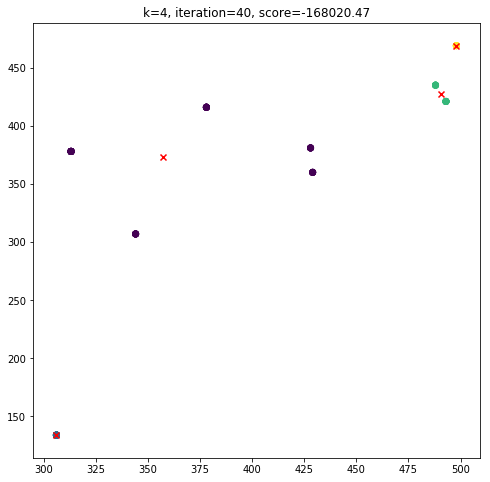

Wall time: 99 ms


In [162]:
%%time
import math
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

def plot_KMeans(data, k):
    model = KMeans(n_clusters=k, init="random", n_init=1, max_iter=k*10, random_state=8).fit(data)
    centroids = model.cluster_centers_
    plt.scatter(data[:,0], data[:,1], marker='o', c=model.labels_)
    plt.scatter(centroids[:,0], centroids[:,1], marker='x', c='r')

    plt.grid(False)
    plt.title("k={}, iteration={}, score={:5.2f}".format(k, k*10, model.score(data)))
    return model

plt.figure(figsize=(8, 8))
k = int(math.sqrt(len(centers)))+1
model = plot_KMeans(centers_weighted, k)
plt.show()

In [163]:
from collections import Counter

cc = Counter(model.labels_)
major_label = cc.most_common()[0][0]
major_label

0

In [180]:
major_centers = centers_weighted[model.labels_==major_label]
major_centers = set([tuple(row) for row in major_centers])
major_centers = np.array(list(major_centers))
major_centers

array([[344, 307],
       [378, 416],
       [313, 378],
       [429, 360],
       [428, 381]])

In [181]:
major_data = data_weighted[model.labels_==major_label]
major_data = set([tuple(row) for row in major_data])
major_data = np.array(list(major_data))
major_data # x, y, width, height, area

array([[418, 355,  21,  15, 163],
       [338, 296,  17,  33, 271],
       [367, 391,  24,  42, 377],
       [418, 375,  18,  16, 119],
       [291, 323,  41,  97, 710]], dtype=int32)

In [182]:
minX = major_data[:,0].min()
minY = major_data[:,1].min()
maxX = (major_data[:,0]+major_data[:,2]).max()
maxY = (major_data[:,1]+major_data[:,3]).max()

In [183]:
print(minX, minY, maxX, maxY)

291 296 439 433


In [191]:
from collections import Counter
import math
from sklearn.cluster import KMeans
import numpy as np

def mergeData(data, centers):
  # 이미지 영역 고려해서 데이터 개수 가중치 주기
  ar = np.sqrt(data[:,-1])
  weight = (ar/ar.sum() * 100 +1).astype('int')
  centers_weighted = np.repeat(centers, weight, axis=0)
  data_weighted = np.repeat(data, weight, axis=0)

  # kmeans model fit & transform
  k = int(math.pow(len(data), 1/2))
  if k<1: k=1
  model = KMeans(n_clusters=k, init="random", n_init=1, max_iter=k*10, random_state=8).fit(centers_weighted)

  cc = Counter(model.labels_)
  major_label = cc.most_common()[0][0]

  # major_centers = centers_weighted[model.labels_==major_label]
  # major_centers = set([tuple(row) for row in major_centers])
  # major_centers = np.array(list(major_centers))

  major_data = data_weighted[model.labels_==major_label]
  major_data = set([tuple(row) for row in major_data])
  major_data = np.array(list(major_data))

  minX = major_data[:,0].min()
  minY = major_data[:,1].min()
  maxX = (major_data[:,0]+major_data[:,2]).max()
  maxY = (major_data[:,1]+major_data[:,3]).max()

  return (minX, minY, maxX, maxY, model.cluster_centers_)

In [187]:
z,zz,zzz,zzzz,model = mergeData(data, centers)

In [31]:
def CreateMarkbyminmax(filename, labels, total_width, total_height, minx, miny, maxx, maxy):
   txtfilename = filename.split('.')
   label_txt = filename.split('_')
   if not(label_txt[0] in labels):
      AddLabel(label_txt[0], labels)
   label = labels[label_txt[0]]

   relative_center_x = ((maxx + minx) /2) / total_width
   relative_center_y = ((maxy + miny) /2) / total_height
   relative_width = (maxx - minx) / total_width
   relative_height = (maxy - miny) / total_height

   filename = './img/'+txtfilename[0]+'.txt'
   with open(filename, 'w') as f:
      data = str(label) +" "+ str(relative_center_x) +" "+ str(relative_center_y) +" "+ str(relative_width) +" "+ str(relative_height)
      f.write(data)

def AddLabel(product, labels):
   labels[product] = len(labels)
   with open('obj.names', 'a') as f:
      f.write("\n"+product)
   with open('obj.data', 'r+t') as f:
      line = 'classes = '+str(len(labels))
      f.write(line+"\n")


def ReadLabel(labels):
   with open('obj.names', 'r') as f:
      while True:
         line = f.readline()
         if not line : break
         line = line.replace("\n","")
         labels[line] = len(labels)

In [32]:
labels ={}

In [33]:
ReadLabel(labels)

In [28]:
labels

{'bottle': 0}

In [254]:
from vidstab import VidStab

stabilizer = VidStab()

# black borders
stabilizer.stabilize(input_path='inni3_2.mp4', 
                     output_path='ppp.mp4', 
                     border_type='black')

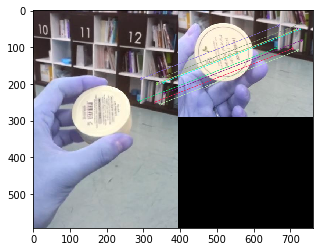

(<matplotlib.image.AxesImage at 0x1e3c7dd1240>, None)

In [252]:
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('pppp.jpg',cv2.COLOR_BGR2GRAY) # queryImage
img2 = cv2.imread('pppp2.jpg',cv2.COLOR_BGR2GRAY) # trainImage
# Initiate SIFT detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance) 
# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None, flags=2)

plt.imshow(img3),plt.show()


In [298]:
from vidstab import VidStab



In [307]:
stabilizer = VidStab()
stabilizer.stabilize(input_path='guide1.mp4', 
                     output_path='_guide1.mp4', 
                     border_type='black')
#                      border_size=30)